<h2> This is the code and figure script to quantify the live cell dynamics of TFF1 </h2> 
<p> The data for this analysis is stored in the folder live_cell_analysis. See the following code to determine the specifics. If it is still unclear, please dont hesitate to contact me: bohrerch@nih.gov. The goal of this section is to quantify the diffusion of the TFF1 allels relative to each other! </p>

In [1]:
#Load in your stuff
#First we are going to load in the needed programs
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy import stats
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan
import math 
import ast
from numpy import mean

In [2]:
(_, _, filenames) = next(os.walk('multi allele cells/'))
data_store={'x normal':[],'y normal':[], 'Frame Difference': []}
df2=pd.DataFrame(data_store)


<h3> Grab live cell data and organize it in terms of displacements </h3>

In [3]:
#This is including jumps of frame (I have done no jumps in frame and it results in similar results)
(_, _, filenames) = next(os.walk('Live_Cell_Analysis/multi allele cells/'))

data_store={'x normal':[],'y normal':[], 'Frame Difference': []}
df2=pd.DataFrame(data_store)

#First extract out the cell names (We want to analyze diffusion within individual cells)
cell=[]
for i in filenames: 
    cell.append(i[0:2])
    
for ii in np.unique(cell):
    
    data_for_cell={}
    count=0
    count2=0
    
    for i in cell:
        
        if i==ii:
            data_for_cell[count]=pd.read_csv('Live_Cell_Analysis/multi allele cells/'+filenames[count2],  header=None, delim_whitespace=True).values
            count=count+1
            #print(i)
            
        count2=count2+1
        
    #Now we are going to generate the displacements between loci given a frame separation and applend it to a data structure
    for iii in range(len(data_for_cell)):
        
        Temp1=data_for_cell[iii]
        #Filter out the repeats (the way the )
        for sack in range(len(Temp1)-1,0,-1):
            if Temp1[sack,0]==Temp1[sack-1,0]:
                Temp1[sack,:]=Temp1[sack,:]*nan
            
        
        for iiii in range(iii+1, len(data_for_cell)):
            
            Temp2=data_for_cell[iiii]
                #Filter out the repeats
            for sack in range(len(Temp2)-1,0,-1):
                if Temp2[sack,0]==Temp2[sack-1,0]:
                    Temp2[sack,:]=Temp2[sack,:]*nan

            
            
            
            data_store={'x normal':[],'y normal':[], 'Frame Difference': []}
            df2_t=pd.DataFrame(data_store)
            for kcat in range(len(Temp1)):
                
                    frame1=Temp1[kcat,3]
                    ind2=Temp2[:,3]==frame1
                    
                    if np.sum(ind2)>0:
                        dis_bet=Temp1[kcat,0:2]-Temp2[ind2,0:2]
                        Frame_dif=Temp1[kcat,3]-Temp2[ind2,3]
                        #This is because the size of the pixel is 160 nm
                        df2_t.loc[len(df2_t.index)] =[dis_bet[0][0]*160,dis_bet[0][1]*160, frame1]
                        
            for kent in range(len(df2_t)):
                    df2_tt=df2_t-df2_t.iloc[kent]
                    df2=df2.append(df2_tt, ignore_index=True)

In [6]:
#Organize the data even further
df2['xsquared']=(df2['x normal']/1000)**2
df2['ysquared']=(df2['y normal']/1000)**2
df2['Root-Mean-Squared Distance x (nm)']=(df2['xsquared'])**.5
df2['Root-Mean-Squared Distance y (nm)']=(df2['ysquared'])**.5
df2['MSD (2d, $\mu m^2$)']=(df2['ysquared']+df2['xsquared'])
df2['Time (sec)']=np.round(df2['Frame Difference']*100,1)
#df2['Time (sec)'][df2['Trajectory']==0]=nan 
df2['MSD (2d, $\mu m^2$)'][df2['Time (sec)']<1]=nan 
df2['Time (sec)'][df2['Time (sec)']<0]=nan 
df2['MSD (2d, $\mu m^2$)'][df2['MSD (2d, $\mu m^2$)']>20]=nan 

<h3> Now we are going to generate the figures and quantify diffusion coef </h3>

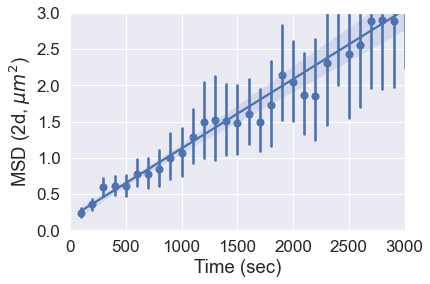

In [10]:
fig=plt.figure()
sns.set(font_scale=1.55)
df2['Time (sec)'][df2['Time (sec)']>3000]=nan 
ax = sns.regplot(x='Time (sec)', y='MSD (2d, $\mu m^2$)',
                        data=df2, scatter_kws=None, x_estimator=np.mean, order=1, x_bins=105)

#This will quantify the diffusion coef, that is the line...
vv1=ax.get_lines()[0].get_xdata()
vv1_2=ax.get_lines()[1].get_xdata()
vv2=ax.get_lines()[0].get_ydata()
vv2_2=ax.get_lines()[1].get_ydata()
plt.ylim(0,3)
plt.xlim(0,3000)
#plt.title('Not Relative')
fig.savefig("Figures/"+"MSD.png", dpi=300, bbox_inches='tight')

In [17]:
#Here we are quantifying the slope and the diff
vv1, vv1_2, vv2, vv2_2
print((.283-.182)/100)
print('D equals = ',.001/4)

0.0010099999999999998
D equals =  0.00025
